In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [5]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [6]:
!kaggle datasets download -d paolodelia/naivebayesleariningsamples

  0% 0.00/1.03M [00:00<?, ?B/s]
100% 1.03M/1.03M [00:00<00:00, 73.2MB/s]


In [7]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  naivebayesleariningsamples.zip
  inflating: Iris_Data.csv           
  inflating: ag_news.csv             
  inflating: play_golf_test.csv      
  inflating: play_golf_train.csv     
  inflating: spam_ham.csv            


In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from matplotlib import pyplot as plt
import pylab
import seaborn as sns
from IPython.core.display import display, HTML
from sklearn import metrics

In [10]:
ls

ag_news.csv    kaggle.json         play_golf_train.csv
Iris_Data.csv  play_golf_test.csv  spam_ham.csv


In [14]:
df = pd.read_csv("Iris_Data.csv")

In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0.5, 0.98, 'Analyzing distribution for the series')

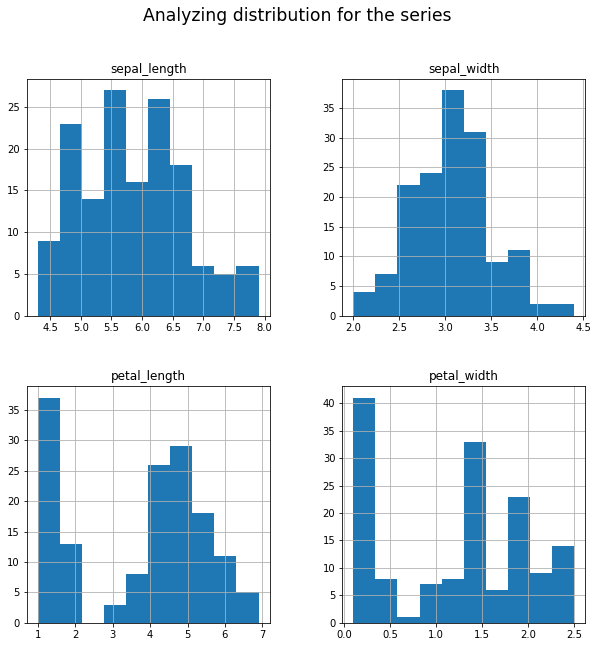

In [16]:
df.hist(
    column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "species"],
    figsize=(10, 10)
)
pylab.suptitle("Analyzing distribution for the series", fontsize="xx-large")

In [17]:
import scipy.stats as stats

for param in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    z, pval = stats.normaltest(df[param])
    
    if(pval < 0.055):
        print("%s has a p-value of %f - distribution is not normal" % (param, pval))
    else:
        print("%s has a p-value of %f" % (param, pval))

sepal_length has a p-value of 0.056824
sepal_width has a p-value of 0.167241
petal_length has a p-value of 0.000000 - distribution is not normal
petal_width has a p-value of 0.000000 - distribution is not normal


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,NaN,NaN,NaN
sepal_width,-0.109369,1.000000,NaN,NaN
petal_length,0.871754,-0.420516,1.000000,NaN
petal_width,0.817954,-0.356544,0.962757,1.0


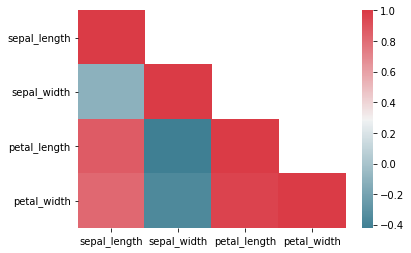

In [18]:
display(HTML('<h1>Analyzing the ' +
             '<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">' +
             'Pearson correlation coefficient</a></h1>'))

# data without the indexes
dt = df[df.columns[0:]]

corr = dt.corr(method="pearson") #returns a dataframe, so it can be reused

# eliminate upper triangle for readability
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)

# seaborn matrix here
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df.loc[:, 'species'], test_size=0.33, random_state=42)

le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [20]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [26]:
from sklearn import metrics

y_pred = []

for index, row in X_test.iterrows():
    pred = model.predict([[row[0], row[1],row[2],row[3]]])
    y_pred.append(pred[0])

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
